<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/statistics/CO2inatm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title CO2 in atomsphere calculations
#@markdown <br><br>This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib inline

#Litterature

https://climate.nasa.gov/news/2915/the-atmosphere-getting-a-handle-on-carbon-dioxide/



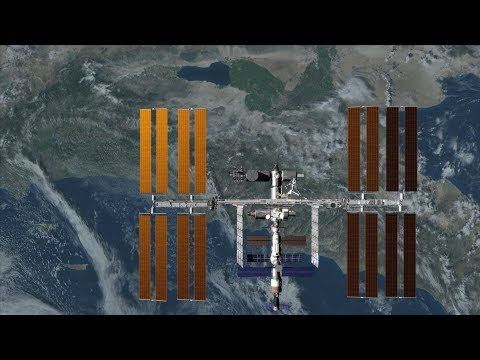

In [3]:
#@title A New View of Carbon Dioxide
from IPython.display import YouTubeVideo
YouTubeVideo('7GMjU5pSufk', width=600, height=400)

#Atmospheric CO2 Concentration

In [ ]:
import altair as alt
from vega_datasets import data

source = data.co2_concentration.url

base = alt.Chart(
    source,
    title="Carbon Dioxide in the Atmosphere"
).transform_calculate(
    year="year(datum.Date)"
).transform_calculate(
    decade="floor(datum.year / 10)"
).transform_calculate(
    scaled_date="(datum.year % 10) + (month(datum.Date)/12)"
).transform_window(
    first_date='first_value(scaled_date)',
    last_date='last_value(scaled_date)',
    sort=[{"field": "scaled_date", "order": "ascending"}],
    groupby=['decade'],
    frame=[None, None]
).transform_calculate(
  end="datum.first_date === datum.scaled_date ? 'first' : datum.last_date === datum.scaled_date ? 'last' : null"
).encode(
    x=alt.X(
        "scaled_date:Q",
        axis=alt.Axis(title="Year into Decade", tickCount=11)
    ),
    y=alt.Y(
        "CO2:Q",
        title="CO2 concentration in ppm",
        scale=alt.Scale(zero=False)
    )
)

line = base.mark_line().encode(
    color=alt.Color(
        "decade:O",
        scale=alt.Scale(scheme="magma"),
        legend=None
    )
)

text = base.encode(text="year:N")

start_year = text.transform_filter(
  alt.datum.end == 'first'
).mark_text(baseline="top")

end_year = text.transform_filter(
  alt.datum.end == 'last'
).mark_text(baseline="bottom")

(line + start_year + end_year).configure_text(
    align="left",
    dx=1,
    dy=3
).properties(width=600, height=375)


alt.LayerChart(...)